In [1]:
from rembg import remove
from PIL import Image, ImageFilter
import cv2
import numpy as np
from matplotlib import pyplot as plt


Remove Background


In [2]:
# 移除背景
input_path = "../High Resolution Pic/Big ben.jpeg"
output_path = "../Processed Pic/London/Big_ben_no_background.png"

input_image = Image.open(input_path)
output_image = remove(input_image)
output_image.save(output_path)

# 移除背景
input_path = "../Pic/London/gear.png"
output_path = "../Processed Pic/London/gear_no_background.png"

input_image = Image.open(input_path)
output_image = remove(input_image)
output_image.save(output_path)



Read Photo

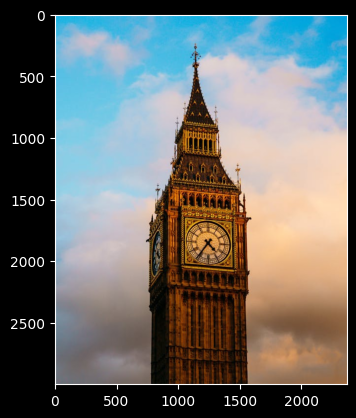

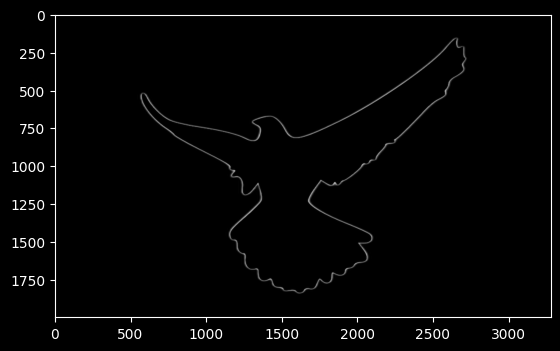

In [3]:
# 读取图像
image_path = "../High Resolution Pic/Big ben.jpeg"
image = cv2.imread(image_path)

# 转换颜色空间
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 显示图像
plt.imshow(image_rgb)
plt.show()


image_path = "../Remove Pic/crow2.png"
image = cv2.imread(image_path)

# 转换颜色空间
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# 显示图像
plt.imshow(image_rgb)
plt.show()

Overlay

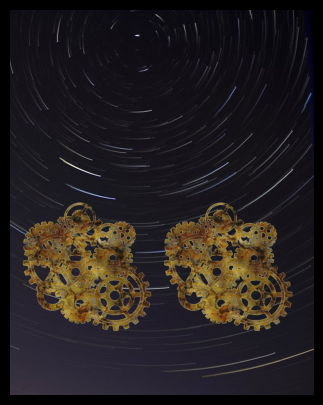

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 读取底层图像和覆盖图像
background_image_path = "../High Resolution Pic/star.jpeg"
overlay_image_path = "../Pic/London/gear.png"  # 替换为你的齿轮图片路径

background = cv2.imread(background_image_path)
overlay = cv2.imread(overlay_image_path, cv2.IMREAD_UNCHANGED)

# 检查图像是否正确加载
if background is None:
    raise FileNotFoundError(f"无法加载背景图像：{background_image_path}")
if overlay is None:
    raise FileNotFoundError(f"无法加载覆盖图像：{overlay_image_path}")

# 调整覆盖图像的大小
overlay = cv2.resize(overlay, (1000, 1000))  # 根据需要调整大小

# 获取覆盖图像的 RGB 通道（忽略透明度）
if overlay.shape[2] == 4:  # 如果有 alpha 通道，去掉 alpha 通道
    b, g, r, a = cv2.split(overlay)
    overlay_rgb = cv2.merge((b, g, r))
    # 使用alpha通道作为掩码
    mask = (a > 0)
else:
    overlay_rgb = overlay
    mask = np.ones((overlay.shape[0], overlay.shape[1]), dtype=bool)  # 全部区域有效

# 定义粘贴位置
x_offset, y_offset = 100 , 1500

# 获取背景图像的感兴趣区域 (ROI)
rows, cols, _ = overlay_rgb.shape

# 检查 ROI 尺寸是否匹配
if y_offset + rows > background.shape[0] or x_offset + cols > background.shape[1]:
    raise ValueError("覆盖图像超出了背景图像的范围")

# 叠加图像
for c in range(0, 3):  # 遍历 RGB 三个通道
    background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] = overlay_rgb[:, :, c] * (mask) + background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] * (~mask)
    

# 定义粘贴位置
x_offset, y_offset = 1200 , 1500

# 获取背景图像的感兴趣区域 (ROI)
rows, cols, _ = overlay_rgb.shape

# 检查 ROI 尺寸是否匹配
if y_offset + rows > background.shape[0] or x_offset + cols > background.shape[1]:
    raise ValueError("覆盖图像超出了背景图像的范围")

# 叠加图像
for c in range(0, 3):  # 遍历 RGB 三个通道
    background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] = overlay_rgb[:, :, c] * (mask) + background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] * (~mask)

# 保存并显示合成后的图像
output_path = "../Processed Pic/London/result.png"
cv2.imwrite(output_path, background)

# 显示图像
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


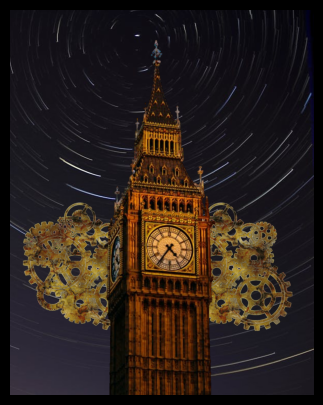

In [5]:

# 读取底层图像和覆盖图像
background_image_path = "../Processed Pic/London/result.png"
overlay_image_path = "../Processed Pic/London/Big ben-Photoroom.png"  # 替换为你的齿轮图片路径

background = cv2.imread(background_image_path)
overlay = cv2.imread(overlay_image_path, cv2.IMREAD_UNCHANGED)

# 检查图像是否正确加载
if background is None:
    raise FileNotFoundError(f"无法加载背景图像：{background_image_path}")
if overlay is None:
    raise FileNotFoundError(f"无法加载覆盖图像：{overlay_image_path}")

# 调整覆盖图像的大小
overlay = cv2.resize(overlay, (2368, 3000))  # 根据需要调整大小


# 获取覆盖图像的 RGB 通道（忽略透明度）
if overlay.shape[2] == 4:  # 如果有 alpha 通道，去掉 alpha 通道
    b, g, r, a = cv2.split(overlay)
    overlay_rgb = cv2.merge((b, g, r))
    # 使用alpha通道作为掩码
    mask = (a > 0)
else:
    overlay_rgb = overlay
    mask = np.ones((overlay.shape[0], overlay.shape[1]), dtype=bool)  # 全部区域有效

# 定义粘贴位置
x_offset, y_offset = 0, 0

# 获取背景图像的感兴趣区域 (ROI)
rows, cols, _ = overlay_rgb.shape

# 检查 ROI 尺寸是否匹配
if y_offset + rows > background.shape[0] or x_offset + cols > background.shape[1]:
    raise ValueError("覆盖图像超出了背景图像的范围")

# 叠加图像
for c in range(0, 3):  # 遍历 RGB 三个通道
    background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] = overlay_rgb[:, :, c] * (mask) + background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] * (~mask)

# 保存并显示合成后的图像
output_path = "../Processed Pic/London/result2.png"
cv2.imwrite(output_path, background)

# 显示图像
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


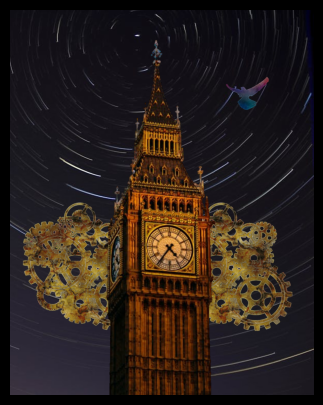

Composite image saved to ../Processed Pic/London/result3.png


In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Paths to the images
background_image_path = "../Processed Pic/London/result2.png"
overlay_image_path = "../Remove Pic/crow2.png"  # Replace with your overlay image path
galaxy_image_path = "../Pic/London/galaxy.jpg"  # The galaxy-like image

# Load the background, overlay, and galaxy images
background = cv2.imread(background_image_path)
overlay = cv2.imread(overlay_image_path, cv2.IMREAD_UNCHANGED)
galaxy = cv2.imread(galaxy_image_path)

# Check if images are loaded correctly
if background is None:
    raise FileNotFoundError(f"Cannot load background image: {background_image_path}")
if overlay is None:
    raise FileNotFoundError(f"Cannot load overlay image: {overlay_image_path}")
if galaxy is None:
    raise FileNotFoundError(f"Cannot load galaxy image: {galaxy_image_path}")

# Resize the overlay and galaxy images as needed
overlay = cv2.resize(overlay, (500, 300))  # Adjust size as needed
galaxy = cv2.resize(galaxy, (overlay.shape[1], overlay.shape[0]))  # Resize galaxy to match overlay

# Apply the galaxy mask to the overlay image
if overlay.shape[2] == 4:  # If there is an alpha channel
    b, g, r, a = cv2.split(overlay)
    overlay_rgb = cv2.merge((b, g, r))
    alpha_channel = a
else:
    overlay_rgb = overlay
    alpha_channel = None

# Blend the overlay image with the galaxy mask
overlay_rgb = cv2.addWeighted(overlay_rgb, 0.5, galaxy, 0.5, 0)

# If there was an alpha channel, merge it back
if alpha_channel is not None:
    overlay = cv2.merge((overlay_rgb, alpha_channel))
else:
    overlay = overlay_rgb

# Handle alpha channel for transparency
if overlay.shape[2] == 4:  # If there is an alpha channel
    b, g, r, a = cv2.split(overlay)
    overlay_rgb = cv2.merge((b, g, r))
    mask = a > 0
else:
    overlay_rgb = overlay
    mask = np.ones((overlay.shape[0], overlay.shape[1]), dtype=bool)  # Entire area is valid

# Define the paste position
x_offset, y_offset = 1600, 500

# Get the region of interest (ROI) from the background image
rows, cols, _ = overlay_rgb.shape

# Check if ROI size matches
if y_offset + rows > background.shape[0] or x_offset + cols > background.shape[1]:
    raise ValueError("The overlay image exceeds the background image's range")

# Overlay the image
for c in range(0, 3):  # Iterate over the RGB channels
    background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] = (
        overlay_rgb[:, :, c] * mask +
        background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] * (~mask)
    )

# Save and display the composite image
output_path = "../Processed Pic/London/result3.png"
cv2.imwrite(output_path, background)

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(f"Composite image saved to {output_path}")


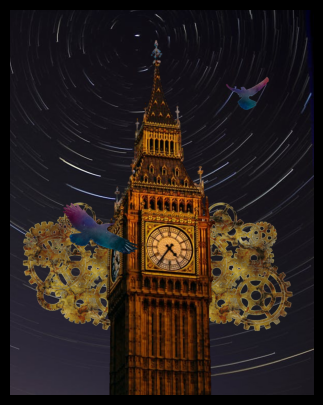

Composite image saved to ../Processed Pic/London/result4.png


In [10]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# Paths to the images
background_image_path = "../Processed Pic/London/result3.png"
overlay_image_path = "../Remove Pic/crow3.png"  # Replace with your overlay image path
galaxy_image_path = "../Pic/London/galaxy.jpg"  # The galaxy-like image

# Load the background, overlay, and galaxy images
background = cv2.imread(background_image_path)
overlay = cv2.imread(overlay_image_path, cv2.IMREAD_UNCHANGED)
galaxy = cv2.imread(galaxy_image_path)

# Check if images are loaded correctly
if background is None:
    raise FileNotFoundError(f"Cannot load background image: {background_image_path}")
if overlay is None:
    raise FileNotFoundError(f"Cannot load overlay image: {overlay_image_path}")
if galaxy is None:
    raise FileNotFoundError(f"Cannot load galaxy image: {galaxy_image_path}")

# Resize the overlay and galaxy images as needed
overlay = cv2.resize(overlay, (600, 400))  # Adjust size as needed
galaxy = cv2.resize(galaxy, (overlay.shape[1], overlay.shape[0]))  # Resize galaxy to match overlay

# Apply the galaxy mask to the overlay image
if overlay.shape[2] == 4:  # If there is an alpha channel
    b, g, r, a = cv2.split(overlay)
    overlay_rgb = cv2.merge((b, g, r))
    alpha_channel = a
else:
    overlay_rgb = overlay
    alpha_channel = None

# Blend the overlay image with the galaxy mask
overlay_rgb = cv2.addWeighted(overlay_rgb, 0.5, galaxy, 0.5, 0)

# If there was an alpha channel, merge it back
if alpha_channel is not None:
    overlay = cv2.merge((overlay_rgb, alpha_channel))
else:
    overlay = overlay_rgb

# Handle alpha channel for transparency
if overlay.shape[2] == 4:  # If there is an alpha channel
    b, g, r, a = cv2.split(overlay)
    overlay_rgb = cv2.merge((b, g, r))
    mask = a > 0
else:
    overlay_rgb = overlay
    mask = np.ones((overlay.shape[0], overlay.shape[1]), dtype=bool)  # Entire area is valid

# Define the paste position
x_offset, y_offset = 400, 1500

# Get the region of interest (ROI) from the background image
rows, cols, _ = overlay_rgb.shape

# Check if ROI size matches
if y_offset + rows > background.shape[0] or x_offset + cols > background.shape[1]:
    raise ValueError("The overlay image exceeds the background image's range")

# Overlay the image
for c in range(0, 3):  # Iterate over the RGB channels
    background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] = (
        overlay_rgb[:, :, c] * mask +
        background[y_offset:y_offset+rows, x_offset:x_offset+cols, c] * (~mask)
    )

# Save and display the composite image
output_path = "../Processed Pic/London/result4.png"
cv2.imwrite(output_path, background)

# Display the image
plt.figure(figsize=(10, 5))
plt.imshow(cv2.cvtColor(background, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

print(f"Composite image saved to {output_path}")


In [11]:
# 读取图像，保留Alpha通道
image = cv2.imread('../Processed Pic/London/result4.png', cv2.IMREAD_UNCHANGED)

# 检查图像是否具有Alpha通道
if image.shape[2] == 4:
    b, g, r, a = cv2.split(image)
    rgb_image = cv2.merge([b, g, r])
else:
    rgb_image = image

# 确保图像类型是float32，以避免颜色失真
rgb_image_float = rgb_image.astype(np.float32)

# 将图像稍微变暗（alpha = 0.8 表示降低亮度到原来的80%）
darker_rgb_image = cv2.convertScaleAbs(rgb_image_float, alpha=0.8, beta=0)

# 合并调整后的RGB和原来的Alpha通道
if image.shape[2] == 4:
    darker_image = cv2.merge([darker_rgb_image[..., 0], darker_rgb_image[..., 1], darker_rgb_image[..., 2], a])
else:
    darker_image = darker_rgb_image

# 保存调整后的图像
cv2.imwrite("../Processed Pic/London/result5.png", darker_image)

# 显示调整后的图像
plt.axis('off')
plt.imshow(cv2.cvtColor(darker_image, cv2.COLOR_BGR2RGB))
plt.show()


FileNotFoundError: Cannot load overlay image: ../Remove Pic/mcrow.png

Test